In [1]:
import sys
sys.path.append("./../../src")
from visualizer_helper import Visualizer
from cluster_helper import ClusterProcessor

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.sparse import csr_matrix
import scipy
import pickle
import os
from annoy import AnnoyIndex
from scipy.sparse.linalg import inv

from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ashea2nd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
cluster_assignments = pd.read_csv("./data/CLUSTER_ASSIGNMENTS.csv")
icd9codes = pd.read_csv("../../data/PATIENT_ICD_ICD9_CODES.csv")
patient_icd_binary = pickle.load(open("../../data/PATIENT_ICD_BINARY_SPARSE_CSR.p", 'rb'))
icd9diag = pd.read_csv("../../../mimic/D_ICD_DIAGNOSES.csv.gz")
icd9proc = pd.read_csv("../../../mimic/D_ICD_PROCEDURES.csv.gz")
k_neighbors = 50

In [3]:
clusters, counts = np.unique(cluster_assignments["CLUSTER"], return_counts=True)
clusters_by_size = sorted(list(zip(clusters, counts)), key=lambda p: p[1], reverse=True)

In [4]:
cp = ClusterProcessor(patient_icd_binary, icd9codes, icd9diag, cluster_assignments, k_neighbors,
                        other_stopwords = ["hypertension", 'disorder'])

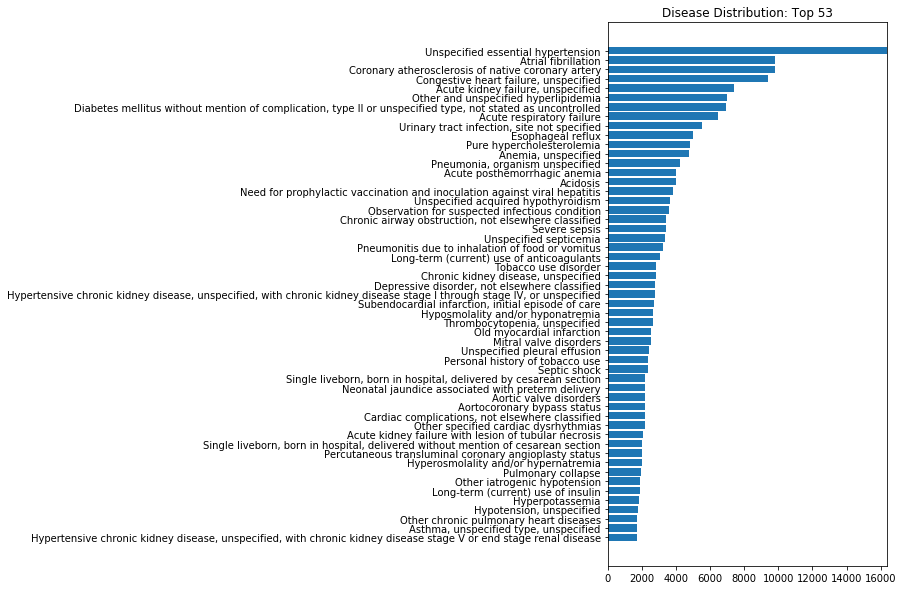

[('4019', 'Unspecified essential hypertension', 16361), ('42731', 'Atrial fibrillation', 9803), ('41401', 'Coronary atherosclerosis of native coronary artery', 9786), ('4280', 'Congestive heart failure, unspecified', 9405), ('5849', 'Acute kidney failure, unspecified', 7397), ('2724', 'Other and unspecified hyperlipidemia', 7016), ('25000', 'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled', 6921), ('51881', 'Acute respiratory failure', 6479), ('5990', 'Urinary tract infection, site not specified', 5538), ('53081', 'Esophageal reflux', 4971), ('2720', 'Pure hypercholesterolemia', 4796), ('2859', 'Anemia, unspecified', 4768), ('486', 'Pneumonia, organism unspecified', 4256), ('2851', 'Acute posthemorrhagic anemia', 4012), ('2762', 'Acidosis', 4005), ('V053', 'Need for prophylactic vaccination and inoculation against viral hepatitis', 3835), ('2449', 'Unspecified acquired hypothyroidism', 3633), ('V290', 'Observation for suspected

In [5]:
print(cp.plot_disease_distribution(53))

2132


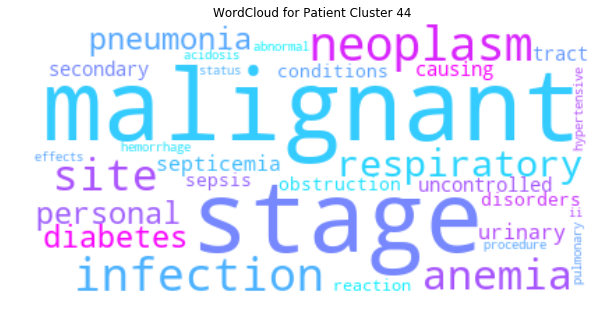

1909


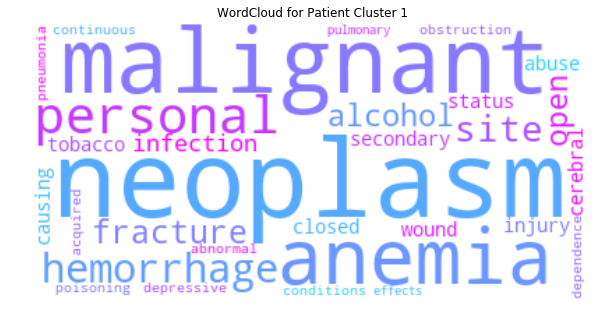

1789


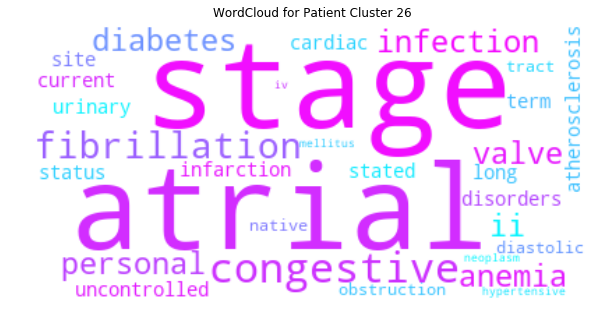

1756


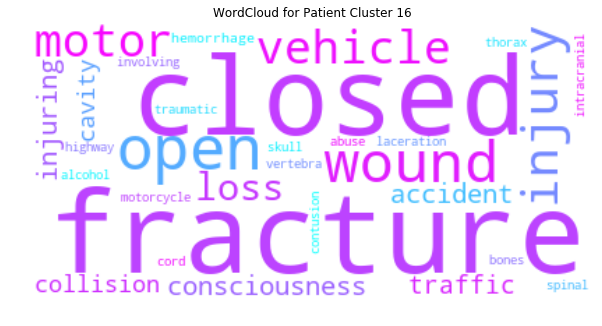

1491


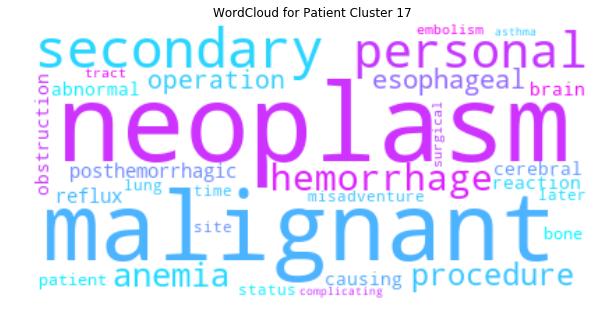

1453


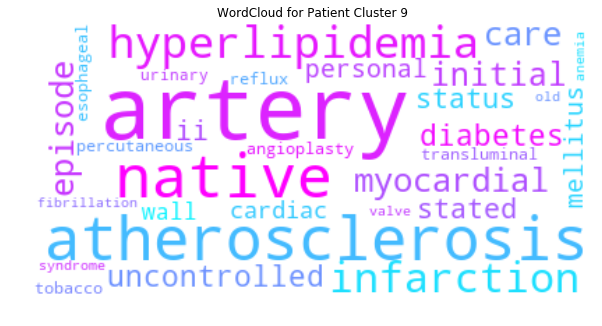

1419


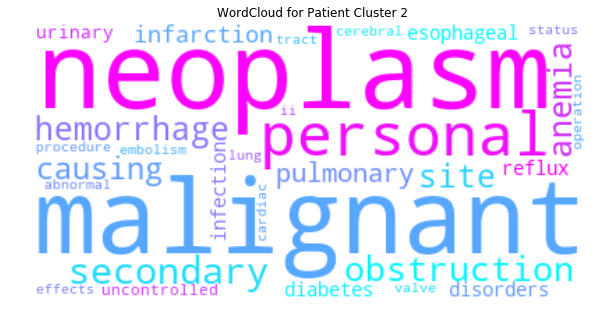

1362


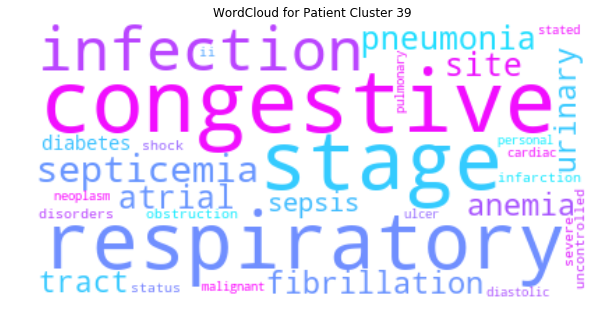

1322


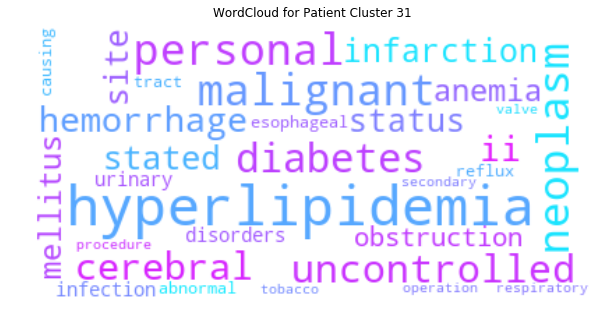

1221


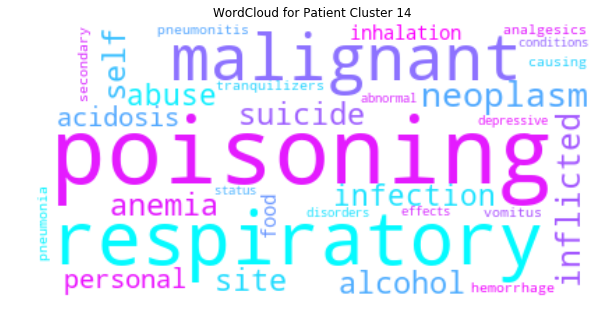

1217


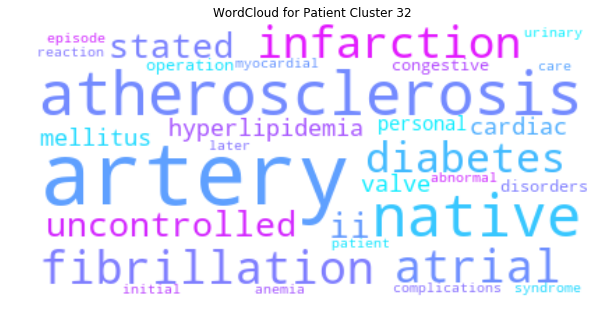

1192


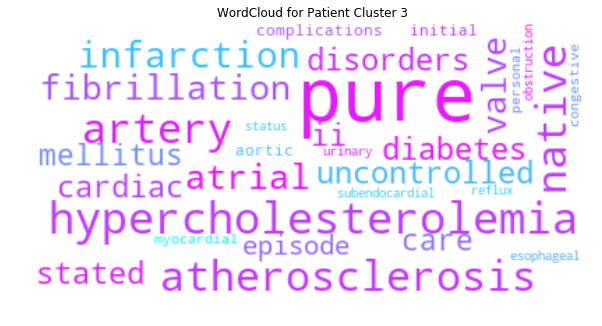

1158


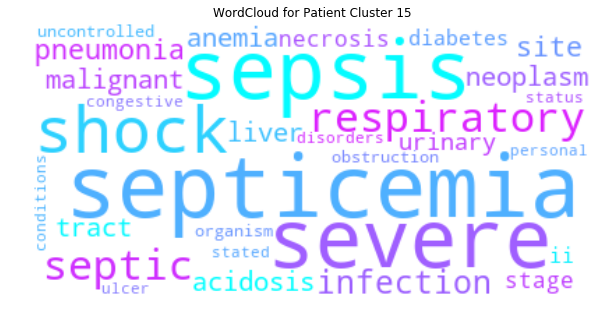

1133


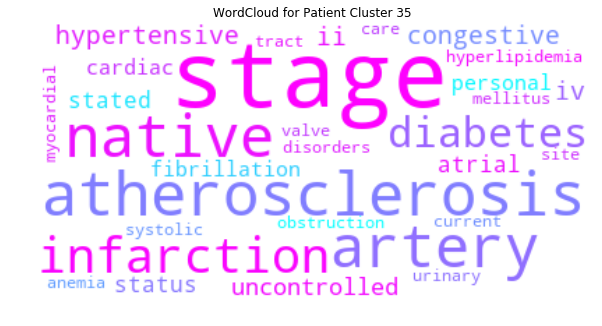

1120


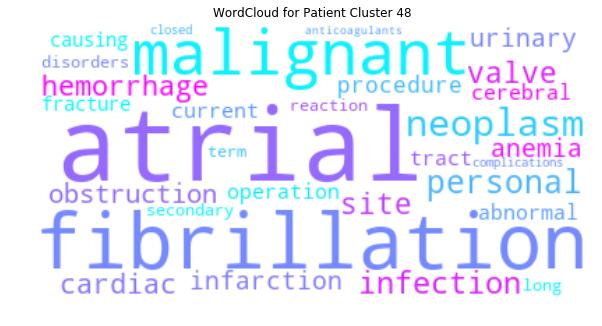

1119


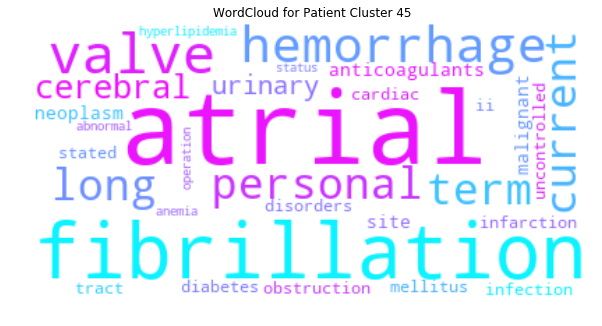

978


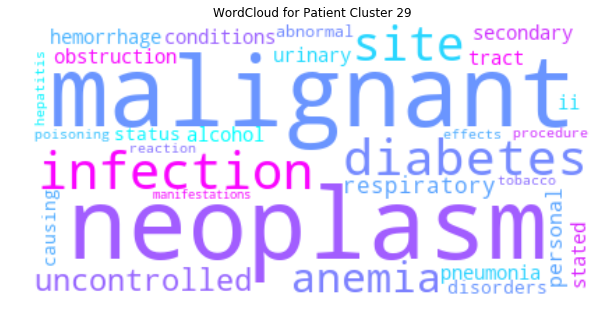

971


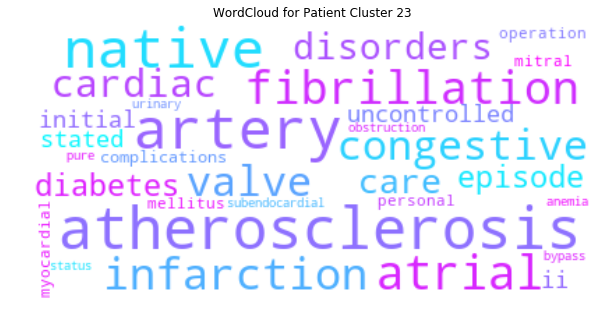

966


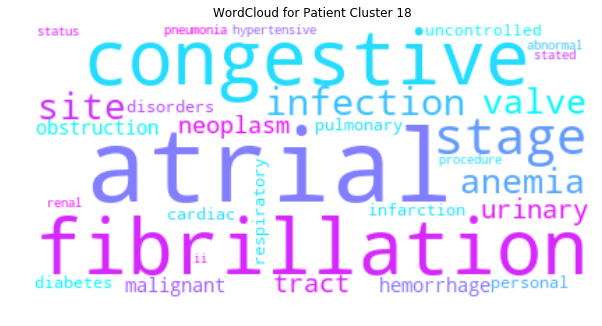

914


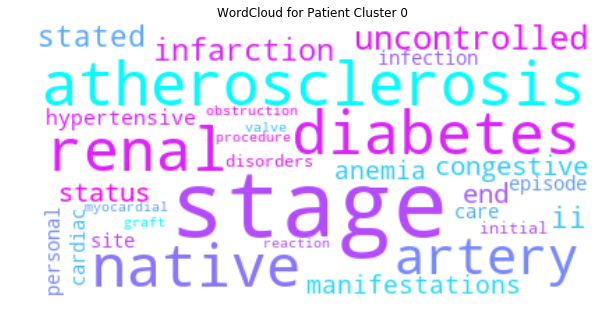

894


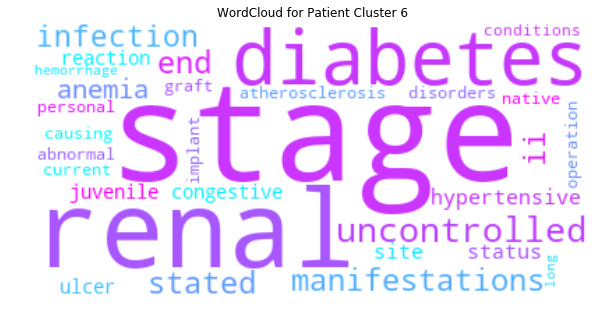

893


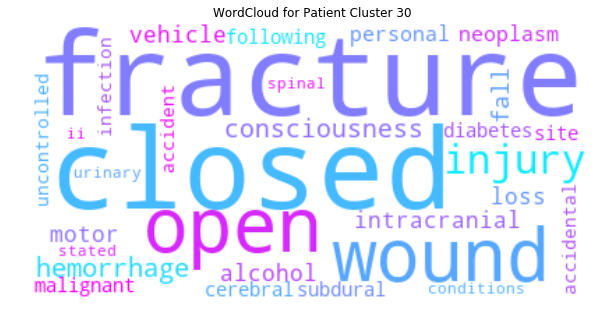

870


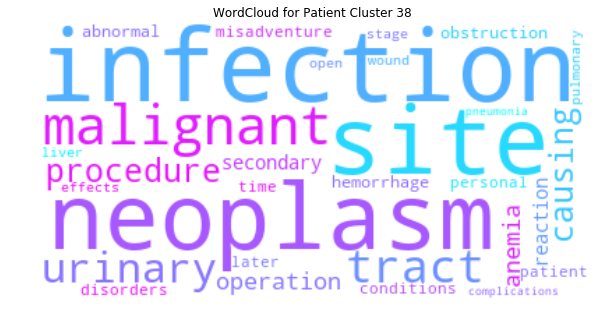

779


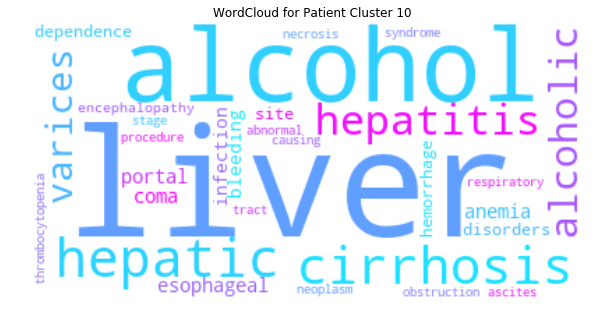

768


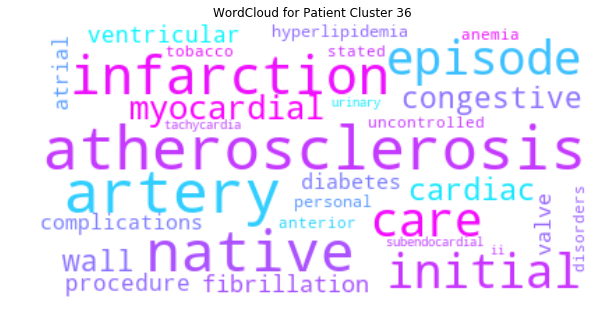

755


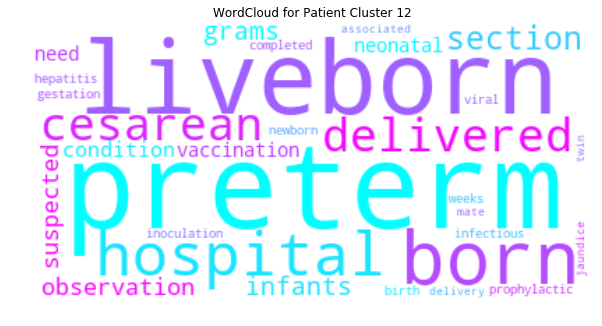

741


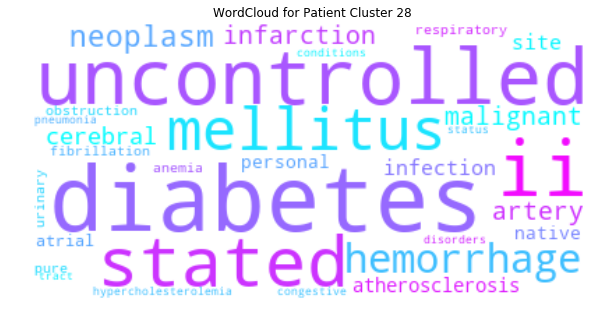

711


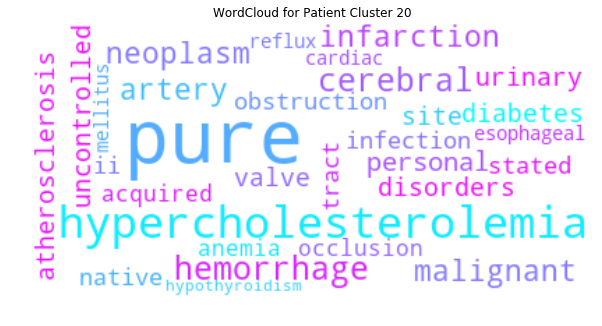

673


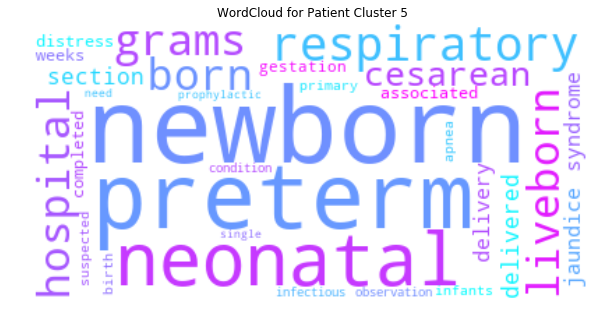

663


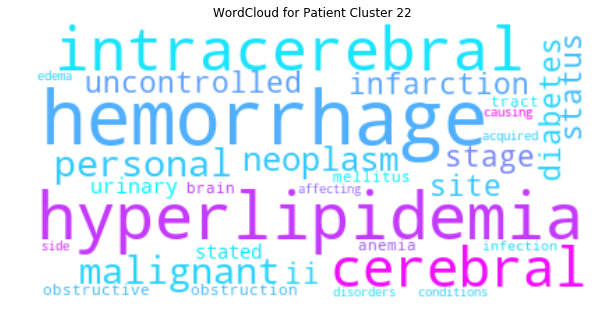

638


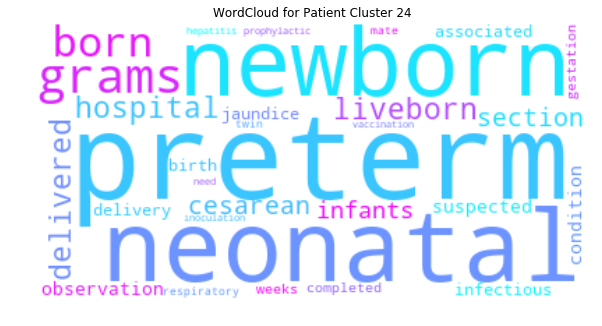

636


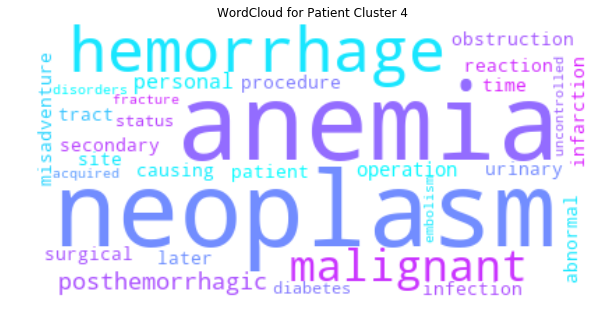

592


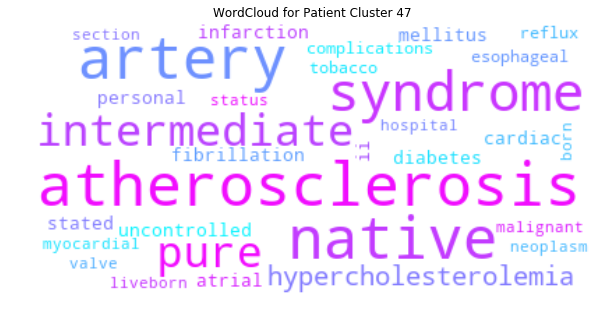

541


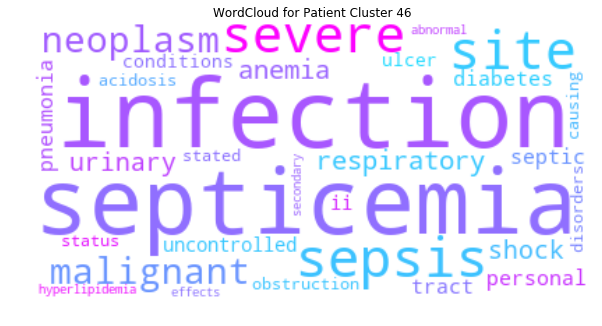

516


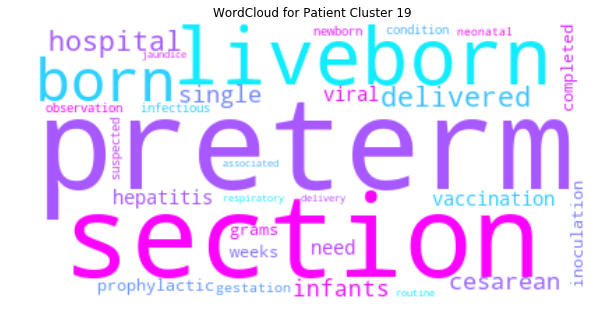

478


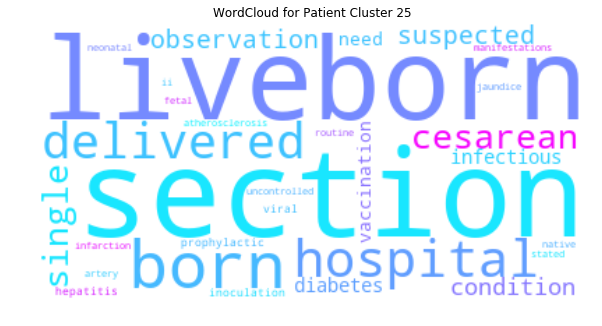

456


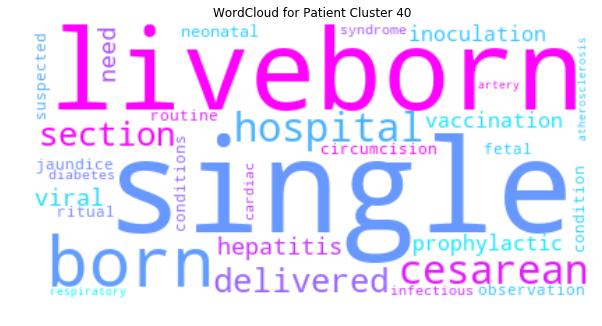

413


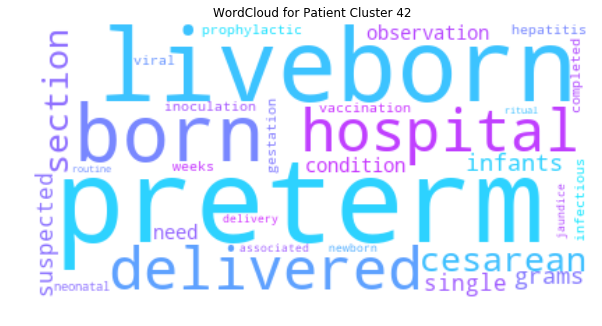

375


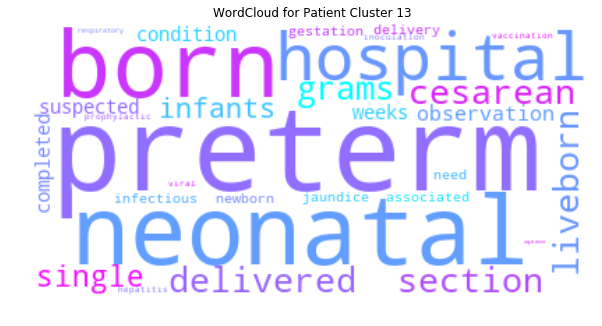

360


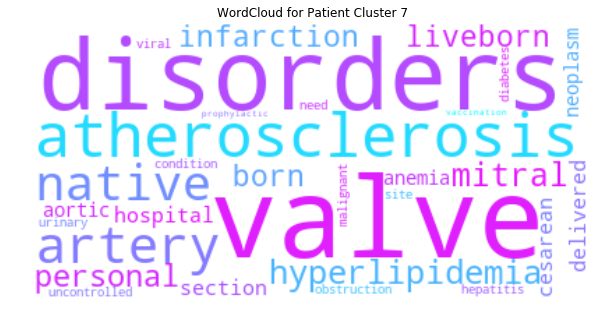

358


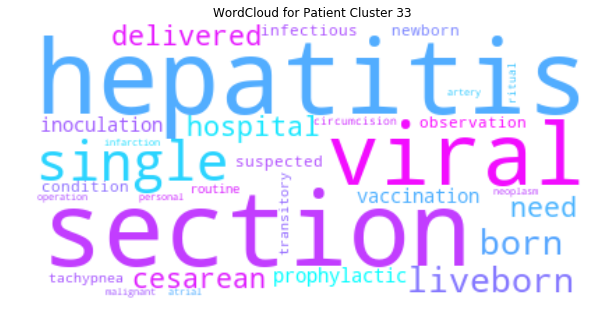

353


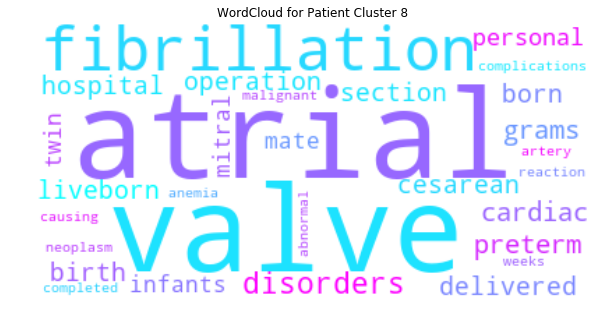

342


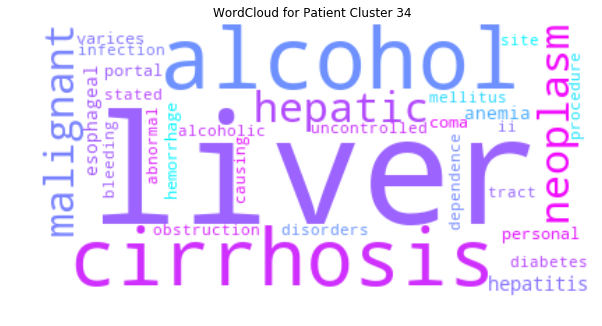

318


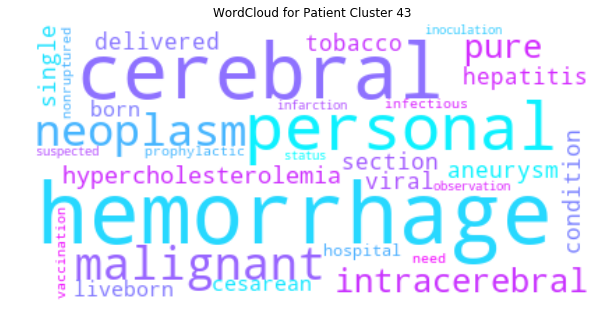

317


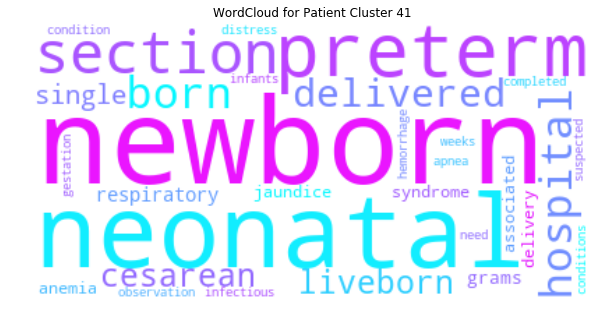

311


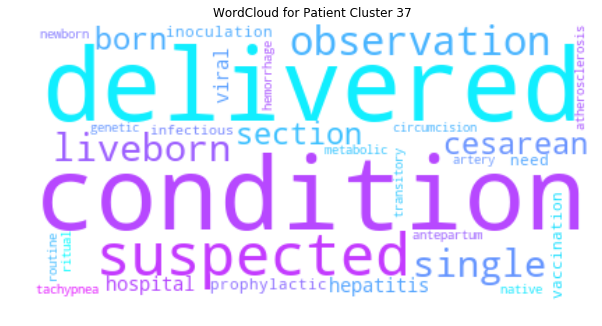

298


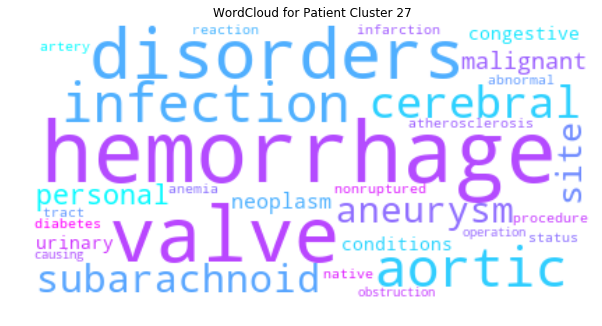

296


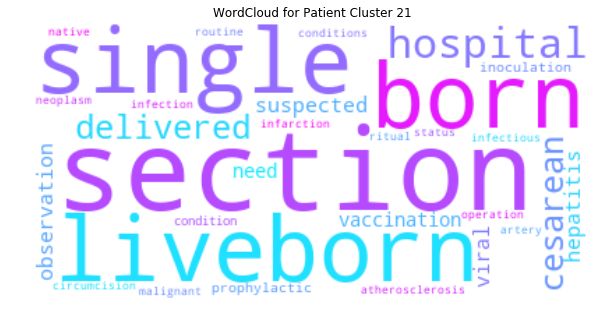

286


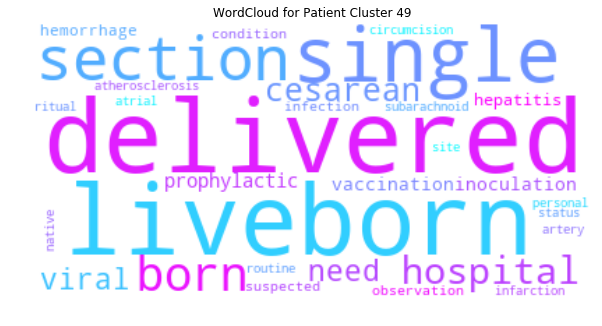

264


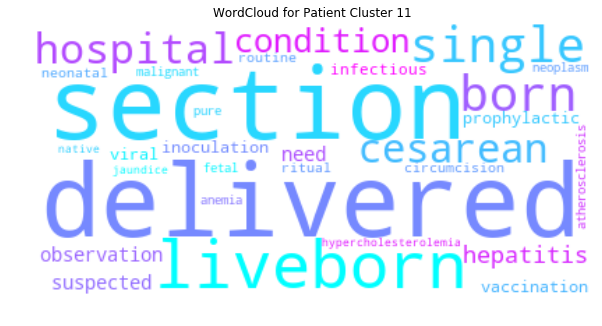

In [8]:
for c, size in clusters_by_size:
    print(size)
    cp.get_cluster_wordcloud(c)

In [ ]:
# def plot_icd_distribution(topk):

remaining_patient_idxs = cluster_assignments["ORIGINAL_INDEX"].values
remaining_patient_icd_binary = patient_icd_binary[remaining_patient_idxs]

patient_as_icd_codes = []
patient_as_titles = []

for i in tqdm(range(remaining_patient_icd_binary.shape[0])):
    patient_icd_idx = np.nonzero(remaining_patient_icd_binary[i])[1]

    patient_icd_codes = icd9codes.iloc[patient_icd_idx].values.flatten()
    patient_icd_codes_str = " ".join(patient_icd_codes)
    patient_as_icd_codes.append(patient_icd_codes_str)

    patient_titles = icd9diag[icd9diag["ICD9_CODE"].isin(patient_icd_codes)]["LONG_TITLE"].values.tolist()
    patient_titles_str = " ".join(patient_titles).lower()
    patient_as_titles.append(patient_titles_str)
    

In [ ]:
icd_tfidf = TfidfVectorizer().fit(patient_as_icd_codes)
title_tfidf = TfidfVectorizer().fit(patient_as_titles)

icd_count = CountVectorizer().fit(patient_as_icd_codes)
title_count = CountVectorizer().fit(patient_as_titles)